In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Behaviour.csv")
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [3]:
cols = ["Profession", "Marrital Status", "Education", "Personal loan", "House Loan", "Wife Working"]
data["Wife Working"]=data["Wife Working"].replace({'m': 'No'})

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    data[i]=le.fit_transform(data[i])

In [5]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,i20,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV,1600000


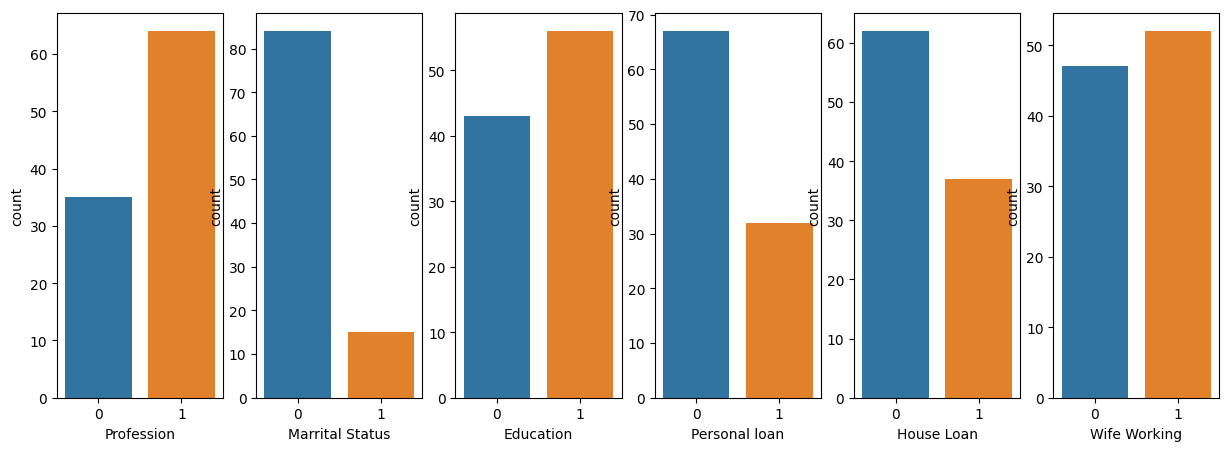

In [6]:
n=0
plt.figure(1, figsize=(15,5))
for i in cols:
    n+=1
    plt.subplot(1,6,n)
    sns.countplot(x = i, data = data)
plt.show()
    

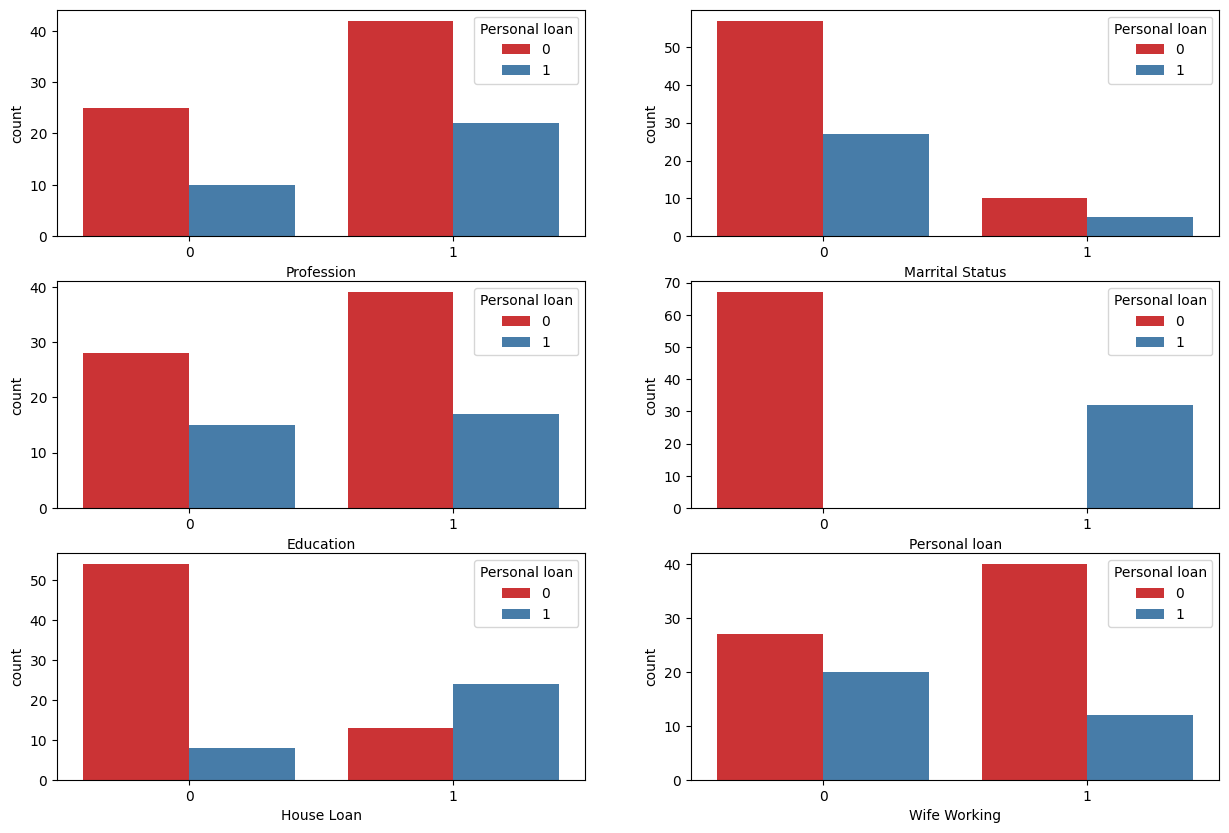

In [159]:
n=0
plt.figure(1, figsize=(15, 10))
for i in cols:
    n+=1
    plt.subplot(3, 2, n)
    sns.countplot(x =i, hue = 'Personal loan',  data = data, palette = 'Set1')
plt.show()

In [8]:
cols1=(data.columns).drop('Make')
# df.drop('a', inplace=True, axis=1)

In [9]:
data1=data.drop("Make", axis=1)

In [10]:
# from sklearn.decomposition import PCA
# from sklearn import preprocessing

# pca_data = preprocessing.scale(data1)

# pca = PCA(n_components=12)
# pc = pca.fit_transform(data1)
# names=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11", "pc12"]
# pf = pd.DataFrame(data=pc, columns=names)
# pf

In [11]:
# std_dev = []
# for i in names:
#     std_dev.append(np.std(pf[i]))
    
# print("Standard Deviation")
# np.array(std_dev)

In [12]:
# pov = pca.explained_variance_ratio_
# print("Proportion of Variance")
# pov

In [13]:
# cp = np.cumsum(pca.explained_variance_ratio_)
# print("Cumulative Proportion")
# cp

CLUSTERING

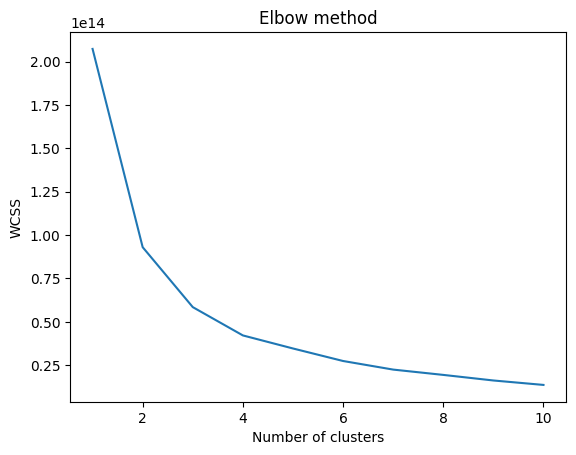

In [14]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    y_kmeans=kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [67]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data1)
pred=kmeans.predict(data1)
data['cluster_num'] = kmeans.predict(data1) #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[0 1 3 1 1 0 0 0 3 0 1 0 0 0 0 2 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 3 2 0
 1 0 1 0 0 1 1 0 2 0 1 0 1 3 2 3 2 2 3 3 0 0 0 0 0 3 0 1 0 2 3 2 0 1 1 0 1
 1 2 3 1 3 2 3 2 3 3 3 0 0 1 2 3 0 2 3 0 3 2 3 2 3]
42146492782458.89
14
[[ 3.20263158e+01  5.52631579e-01  3.42105263e-01  5.52631579e-01
   1.81578947e+00  3.68421053e-01  2.89473684e-01  2.89473684e-01
   1.17894737e+06  1.60526316e+05  1.33947368e+06  8.52894737e+05]
 [ 3.56153846e+01  7.30769231e-01  5.55111512e-17  5.38461538e-01
   2.15384615e+00  1.92307692e-01  3.07692308e-01  1.00000000e+00
   1.55769231e+06  8.84615385e+05  2.44230769e+06  1.38846154e+06]
 [ 4.22000000e+01  8.00000000e-01  0.00000000e+00  6.66666667e-01
   2.53333333e+00  2.00000000e-01  4.00000000e-01  1.00000000e+00
   2.65333333e+06  1.58666667e+06  4.24000000e+06  1.74000000e+06]
 [ 4.09500000e+01  6.00000000e-01  1.00000000e-01  5.50000000e-01
   2.65000000e+00  5.00000000e-01  6.00000000e-01 -1.11022302e-16
   2.34000000e+06  0.00000000e+00  2.34000000e+0

In [68]:
pred

array([0, 1, 3, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 3, 2, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 2, 0, 1, 0, 1, 3, 2, 3, 2, 2, 3, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0,
       2, 3, 2, 0, 1, 1, 0, 1, 1, 2, 3, 1, 3, 2, 3, 2, 3, 3, 3, 0, 0, 1,
       2, 3, 0, 2, 3, 0, 3, 2, 3, 2, 3])

In [69]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 38, 1: 26, 3: 20, 2: 15})

In [70]:
# # correlation coefficient between original variables and the component
# loadings = pca.components_
# num_pc = pca.n_features_
# pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
# loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
# loadings_df['variable'] = data1.columns.values
# loadings_df = loadings_df.set_index('variable')
# loadings_df

In [96]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,cluster_num
0,27,1,1,1,0,1,0,0,800000,0,800000,i20,800000,0
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster,1200000,3
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City,1200000,1
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV,1600000,1


In [144]:
plot_cols=["Age", "No of Dependents", "Salary", "Wife Salary", "Total Salary", "Price"]

In [72]:
Cluster_0 = data1[data.cluster_num==0]
Cluster_1 = data1[data.cluster_num==1]
Cluster_2 = data1[data.cluster_num==2]
Cluster_3 = data1[data.cluster_num==3]

In [73]:
data['cluster_num'].value_counts()

0    38
1    26
3    20
2    15
Name: cluster_num, dtype: int64

Age Mean:  32.026315789473685
No of Dependents Mean:  1.8157894736842106
Salary Mean:  1178947.3684210526
Wife Salary Mean:  160526.31578947368
Total Salary Mean:  1339473.6842105263
Price Mean:  852894.7368421053


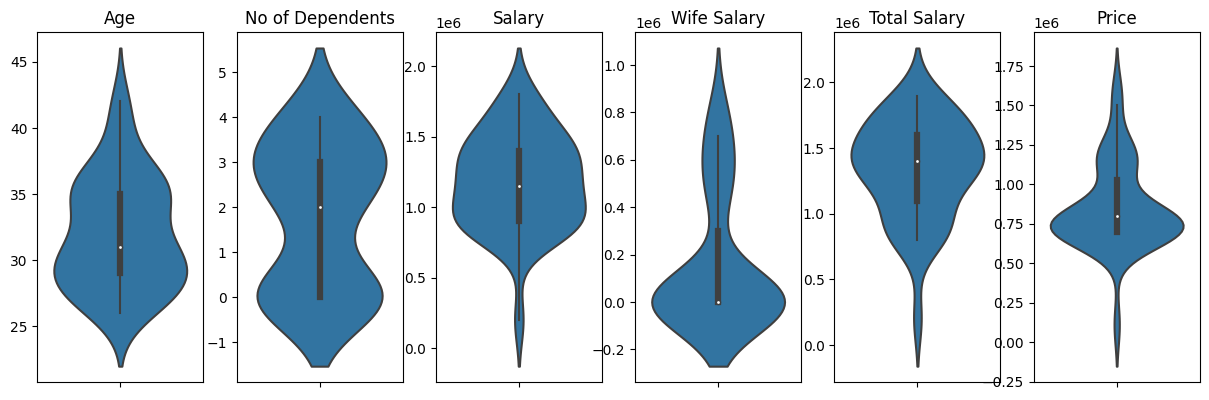

In [152]:
plt.figure(1, figsize=(15, 10))
n=0
for i in plot_cols:
    n+=1
    plt.subplot(2, 6, n)
    sns.violinplot(y=Cluster_0[i])
    plt.title(i)
    plt.ylabel("")
    print(i, "Mean: ", Cluster_0[i].mean())
plt.show()

Age Mean:  35.61538461538461
No of Dependents Mean:  2.1538461538461537
Salary Mean:  1557692.3076923077
Wife Salary Mean:  884615.3846153846
Total Salary Mean:  2442307.6923076925
Price Mean:  1388461.5384615385


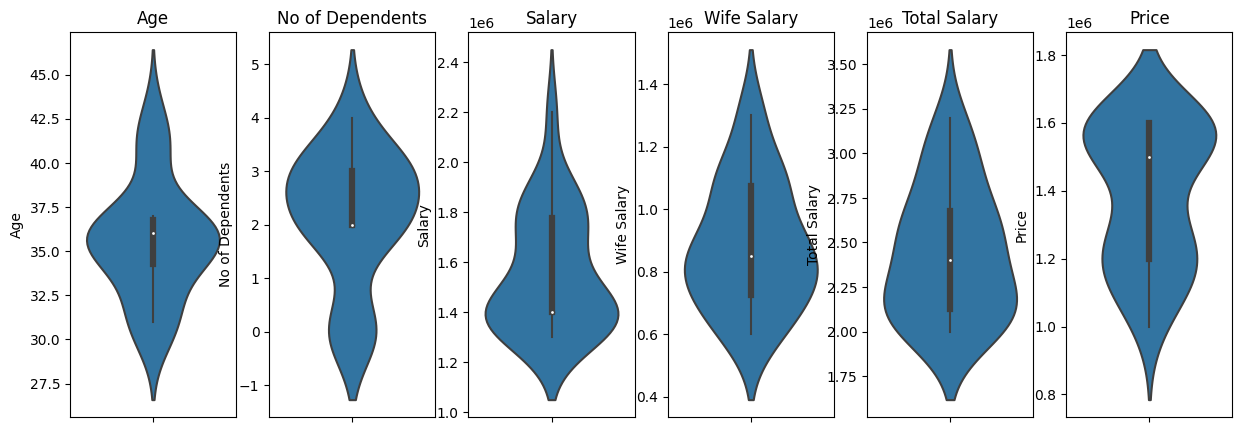

In [153]:
plt.figure(1, figsize=(15, 5))
n=0
for i in plot_cols:
    n+=1
    plt.subplot(1, 6, n)
    sns.violinplot(y=Cluster_1[i])
    plt.title(i)
    print(i, "Mean: ", Cluster_1[i].mean())
plt.show()

Age Mean:  42.2
No of Dependents Mean:  2.533333333333333
Salary Mean:  2653333.3333333335
Wife Salary Mean:  1586666.6666666667
Total Salary Mean:  4240000.0
Price Mean:  1740000.0


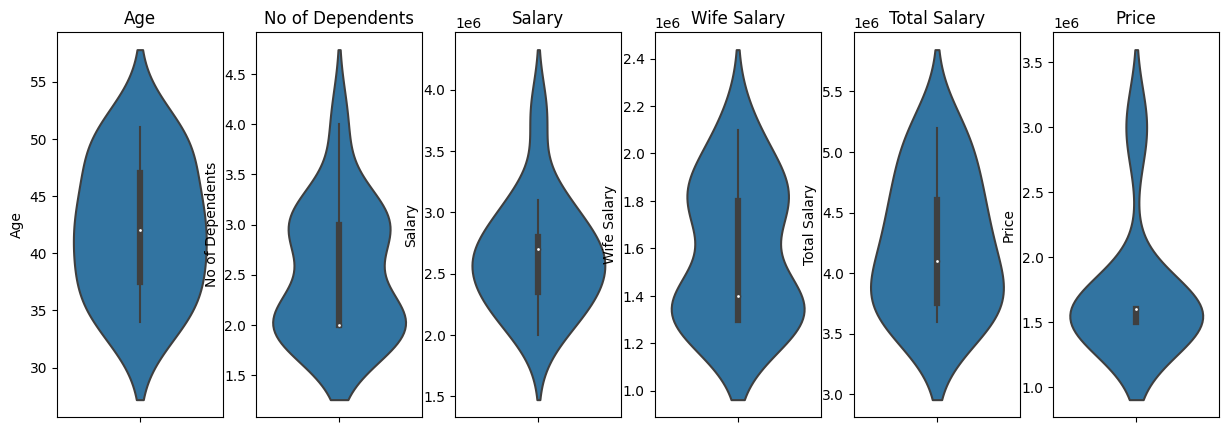

In [154]:
plt.figure(1, figsize=(15, 5))
n=0
for i in plot_cols:
    n+=1
    plt.subplot(1, 6, n)
    sns.violinplot(y=Cluster_2[i])
    plt.title(i)
    print(i, "Mean: ", Cluster_2[i].mean())
plt.show()

Age Mean:  40.95
No of Dependents Mean:  2.65
Salary Mean:  2340000.0
Wife Salary Mean:  0.0
Total Salary Mean:  2340000.0
Price Mean:  1180000.0


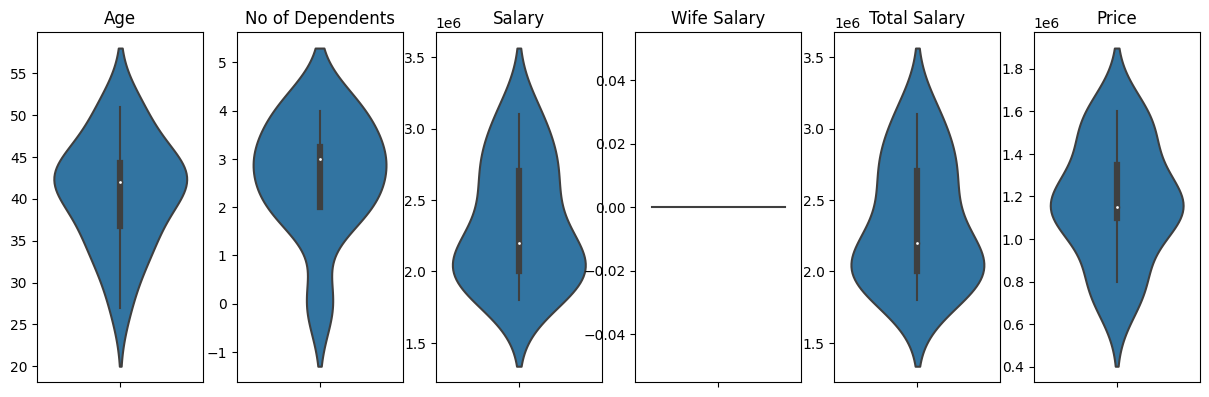

In [155]:
plt.figure(1, figsize=(15, 10))
n=0
for i in plot_cols:
    n+=1
    plt.subplot(2, 6, n)
    sns.violinplot(y=Cluster_3[i])
    plt.title(i)
    plt.ylabel("")
    print(i, "Mean: ", Cluster_3[i].mean())
plt.show()

In [100]:
cluster_list = ["Cluster_0", "Cluster_1", "Cluster_2", "Cluster_3"]

In [177]:
Cluster_0.mean()

Age                 3.202632e+01
Profession          5.526316e-01
Marrital Status     3.421053e-01
Education           5.526316e-01
No of Dependents    1.815789e+00
Personal loan       3.684211e-01
House Loan          2.894737e-01
Wife Working        2.894737e-01
Salary              1.178947e+06
Wife Salary         1.605263e+05
Total Salary        1.339474e+06
Price               8.528947e+05
dtype: float64

In [170]:
plt.figure(1, figsize=(15,5))
for i in data1.columns:
    for j in cluster_list:
#         n=0
#         n+=1
#         plt.subplot(1,6,n)
        sns.countplot(x = i, hue = j,  data = data, palette = 'Set1')
#         sns.countplot(x = i, data = Cluster_0)
    plt.show()

ValueError: Could not interpret input 'Cluster_0'

<Figure size 1500x500 with 0 Axes>